In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
bank = pd.read_csv('bank.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
bank['y'] = bank['y'].replace({'no':0, 'yes':1})

In [4]:
bank['month'].replace(['jan','feb','mar','apr','may','jun',
                      'jul','aug','sep','oct','nov','dec'],
                     [1,2,3,4,5,6,7,8,9,10,11,12],
                     inplace=True)

In [5]:
bank.shape

(4521, 17)

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   int64 
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(9), object(8)
memory usage: 600.6+ KB


In [7]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
bank.describe()

,age,balance,day,month,duration,campaign,pdays,previous,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,6.166777,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,3009.638142,8.247667,2.378380,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,-3313.000000,1.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,5.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,6.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,8.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,12.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


In [9]:
bank.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,poutcome
count,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,4
top,management,married,secondary,no,yes,no,cellular,unknown
freq,969,2797,2306,4445,2559,3830,2896,3705


In [10]:
bank['y'].value_counts(0)

0    4000
1     521
Name: y, dtype: int64

In [11]:
X = bank.drop(['y'], axis=1)

In [12]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,10,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,5,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,4,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,6,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,5,226,1,-1,0,unknown


In [13]:
y = bank['y']

In [14]:
# dữ liệu có sự chênh lệch giữa 0 và 1

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
ohe = OneHotEncoder()
ohe = ohe.fit(X[['job', 'marital', 'education', 'default',
               'housing','loan','contact','poutcome']])
X_ohe = ohe.transform(X[['job','marital','education','default',
                        'housing','loan','contact','poutcome']]) 


In [17]:
X_ohe

<4521x32 sparse matrix of type '<class 'numpy.float64'>'
	with 36168 stored elements in Compressed Sparse Row format>

In [18]:
X_ohe_new = X_ohe.toarray()

In [19]:
ohe.get_feature_names_out(['job', 'marital', 'education', 'default',
                           'housing','loan','contact','poutcome'])


array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype=object)

In [20]:
X_ohe_new[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
        0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [21]:
X_ohe_df = pd.DataFrame(X_ohe_new,
                       columns=ohe.get_feature_names_out(['job', 'marital', 'education', 'default',
                           'housing','loan','contact','poutcome'])
)

In [22]:
X_ohe_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [23]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [24]:
X_new = pd.concat([X[['age','balance','day','month','duration',
                     'campaign', 'pdays','previous']], X_ohe_df], axis=1)

In [25]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4521 non-null   int64  
 1   balance              4521 non-null   int64  
 2   day                  4521 non-null   int64  
 3   month                4521 non-null   int64  
 4   duration             4521 non-null   int64  
 5   campaign             4521 non-null   int64  
 6   pdays                4521 non-null   int64  
 7   previous             4521 non-null   int64  
 8   job_admin.           4521 non-null   float64
 9   job_blue-collar      4521 non-null   float64
 10  job_entrepreneur     4521 non-null   float64
 11  job_housemaid        4521 non-null   float64
 12  job_management       4521 non-null   float64
 13  job_retired          4521 non-null   float64
 14  job_self-employed    4521 non-null   float64
 15  job_services         4521 non-null   f

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y,
                                                   test_size=0.3,
                                                   random_state=42)


In [27]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
model.score(X_new,y)

0.9593010395930104

In [29]:
model.score(X_train,y_train)

1.0

In [30]:
model.score(X_test,y_test)

0.864406779661017

In [31]:
# Có hiện tượng overfitting

In [32]:
# đánh giá model
y_pred = model.predict(X_test)

In [33]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1117   88]
 [  96   56]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1205
           1       0.39      0.37      0.38       152

    accuracy                           0.86      1357
   macro avg       0.65      0.65      0.65      1357
weighted avg       0.86      0.86      0.86      1357



In [34]:
from sklearn.metrics import roc_curve, auc

In [42]:
probs = model.predict_proba(X_test)

In [44]:
scores = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores)

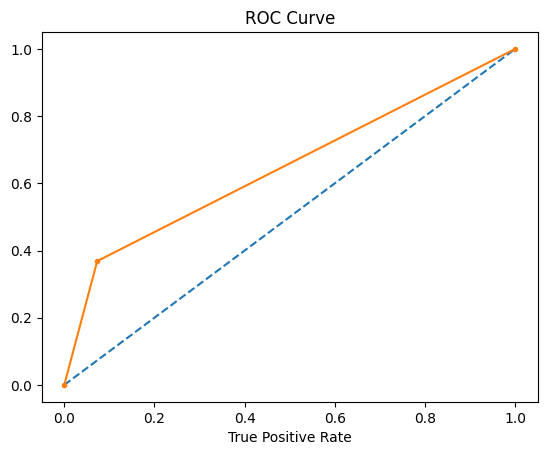

In [45]:
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()

In [46]:
auc(fpr, tpr)

0.6476960034942127

In [47]:
from IPython.display import Image
from sklearn import tree
import pydotplus

In [61]:
dot_data = tree.export_graphviz(model, None,
                               feature_names=X_new.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [57]:
# Giải pháp tốt hơn

In [58]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [63]:
standard_scalar = StandardScaler()
X_train_sc_resampled =standard_scalar.fit_transform(X_resampled)
X_test_sc = standard_scalar.transform(X_test)

In [64]:
tree_model = DecisionTreeClassifier()

In [66]:
tree_model.fit(X_train_sc_resampled, y_resampled)

DecisionTreeClassifier()

In [67]:
tree_model.score(X_train_sc_resampled, y_resampled)

1.0

In [68]:
tree_model.score(X_test_sc, y_test)

0.8511422254974208

In [69]:
# Cũng còn overfitting

In [70]:
y_pred1 = tree_model.predict(X_test_sc)

In [71]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[1081  124]
 [  78   74]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1205
           1       0.37      0.49      0.42       152

    accuracy                           0.85      1357
   macro avg       0.65      0.69      0.67      1357
weighted avg       0.87      0.85      0.86      1357



### RandomForest Classifier

In [72]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
model.score(X_new, y)

0.9705817297058172

In [75]:
model.score(X_train, y_train)

1.0

In [76]:
model.score(X_test, y_test)

0.9019896831245394

In [77]:
# Đánh giá model
y_pred = model.predict(X_test)

In [79]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1185   20]
 [ 113   39]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1205
           1       0.66      0.26      0.37       152

    accuracy                           0.90      1357
   macro avg       0.79      0.62      0.66      1357
weighted avg       0.88      0.90      0.88      1357



In [81]:
# Model dự đoán class 1 chưa được chính xác
from sklearn.metrics import roc_curve,auc

In [83]:
probs = model.predict_proba(X_test)

In [84]:
scores = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores)

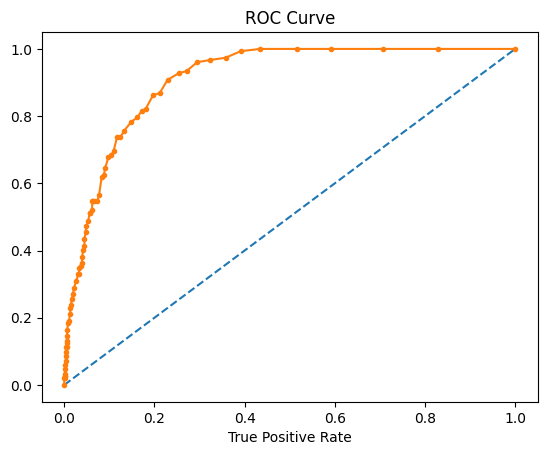

In [86]:
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr, tpr, marker = '.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()

In [88]:
auc(fpr, tpr)

0.9102833588119676